In [1]:
# import libraries
import snscrape.modules.twitter as sntwitter
import itertools,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [2]:
#Accept input from user and store in dataframe
topic=input('Please input topic you want to analyze ')
num_tweet= int(input("How many tweets do you want to analye? "))
a = input('Lets know the region you want to use "PLEASE ENTER THE NAME OF A CITY" ')
locat = '"' + a + '"'
tweet_df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    topic+ ' near:'+locat + " within:10km").get_items(), num_tweet))[['rawContent']]



Please input topic you want to analyze Accra
How many tweets do you want to analye? 100
Lets know the region you want to use "PLEASE ENTER THE NAME OF A CITY" Accra


In [3]:
#put text in a list and create a new dataframe
tweet_list = tweet_df['rawContent'].tolist()
tweet_df = pd.DataFrame(tweet_list)
tweet_df.head()


,0
0,"Just posted a photo @ Accra, Ghana https://t.c..."
1,how i miss the simpler times.
2,3 bedroom houses for sale at Adenta Pantag Acc...
3,real
4,little miss nasty


In [4]:
#Clean data by removing  special characters
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)"," ",text).split())
tweet_df['cleaned_data']= tweet_df[0].apply(clean_data)

In [5]:
tweet_df.head()

,0,cleaned_data
0,"Just posted a photo @ Accra, Ghana https://t.c...",Just posted a photo Accra Ghana
1,how i miss the simpler times.,how i miss the simpler times
2,3 bedroom houses for sale at Adenta Pantag Acc...,3 bedroom houses for sale at Adenta Pantag Acc...
3,real,real
4,little miss nasty,little miss nasty


In [6]:
#Change all uppercase letters to lowercase

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data']= tweet_df['cleaned_data'].apply(lower_case)
    

In [7]:
#Lematise text(adjectives)
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data']= tweet_df['cleaned_data'].apply(lemmatise)
tweet_df['cleaned_data'].values


array(['just posted a photo accra ghana', 'how i miss the simpler time',
       '3 bedroom house for sale at adenta pantag accra ghana ghc 700 000 skynews pokemonpresents bbnaijalevelup bbnaijas7',
       'real', 'little miss nasty', 'fayy come accra',
       'just posted a photo osu accra',
       'school ha reopen all student of sportybet senior high school are to report today',
       'meditant i don t blame what zlatan said i blame who is posting cu the man played psg a club accra heart of oak ha more trophy than',
       'henrie bos we know you can pay', 'god', 'wait what',
       'in chapter 23 of letter to nnaa naama i share my thought on perennial flooding especially in the capital city accra i also make some suggestion on how both citizen and our elected leader can collectively work toward solving the problem letterstonnaanaama letsbuildghana',
       'we are francis nsawam road church of christ accra ghana',
       'na why i ve stopped watching them', 'ki ni',
       'attobra

In [8]:
#Remove stopwords
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens= [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text
tweet_df['cleaned_data']= tweet_df['cleaned_data'].apply(remove_stopwords)

tweet_df['cleaned_data'].values

array(['posted photo accra ghana', 'miss simpler time',
       '3 bedroom house sale adenta pantag accra ghana ghc 700 000 skynews pokemonpresents bbnaijalevelup bbnaijas7',
       'real', 'little miss nasty', 'fayy come accra',
       'posted photo osu accra',
       'school ha reopen student sportybet senior high school report today',
       'meditant blame zlatan said blame posting cu man played psg club accra heart oak ha trophy',
       'henrie bos know pay', 'god', 'wait',
       'chapter 23 letter nnaa naama share thought perennial flooding especially capital city accra also make suggestion citizen elected leader collectively work toward solving problem letterstonnaanaama letsbuildghana',
       'francis nsawam road church christ accra ghana',
       'na stopped watching', 'ki ni', 'attobrah na breakfast go hot',
       'ayi', 'attobrah continue',
       'threatened quit accra academy asamoah gyan wa admitted j e sarpong',
       'attobrah told na', 'toor', 'rubbish rubbish',
  

In [9]:
#define the polarity 
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if (pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<= 0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity']= tweet_df['cleaned_data'].apply(get_polarity)


In [10]:
#print polaeity
tweet_df['polarity'].value_counts()

Neutral              70
Weakly Positive      10
Positive              5
strongly Positive     4
Weakly Negative       4
Negative              2
Strongly Negative     2
Name: polarity, dtype: int64

In [12]:
#Finding the mean polarity to generalize neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0
neutral =0

for i in range (0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol= textblob.sentiment.polarity
    if (pol==0):
        neutral +=1
    elif(pol>0 and pol <=0.3):
        wpositive +=1
    elif(pol>0.3 and pol <=0.6):
        positive +=1
    elif(pol>0.6 and pol <=1):
        spositive += 1
    elif(pol > -0.3 and pol <= 0):
        wnegative +=1
    elif(pol > -0.6 and pol <= -0.3):
        negative +=1
    elif(pol > -1 and pol<= -0.6):
        snegative +=1
            


In [13]:
polarity = polarity / num_tweet
polarity

0.03337462121212121

In [14]:
#function for calculating percentage of polarity

def percentage(part, whole):
    temp = 100* float(part)/ float(whole)
    return format(temp, '.2f')

In [15]:
#calling the percentage function
positive = percentage(positive, num_tweet)
wpositive = percentage(wpositive, num_tweet)
spositive = percentage(spositive, num_tweet)
negative = percentage(negative, num_tweet)
wnegative = percentage(wnegative, num_tweet)
snegative = percentage(snegative, num_tweet)
neutral = percentage(neutral, num_tweet)

In [16]:
#Printing summary report

print("How people are reacting on "+ topic + " by analyzing "+ str(num_tweet)+ " tweets")
print()
print("-----------------------------------------------------------------")
print()
print("General Report: ")

if (polarity==0):
    print("Neutral")
elif(polarity>0 and polarity <=0.3):
    print("Weakly Positive")
elif(polarity>0.3 and polarity <=0.6):
    print("Positive")
elif(polarity>0.6 and polarity <=1):
    print("Strongly positive")
elif(polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif(polarity > -0.6 and polarity <=-0.3):
    print("Negative")
elif(polarity > -1 and polarity <=-0.6):
    print ("Strongly Negative")
        
        
print()
print("------------------------------------------------------------------")
print("Detailed Report: ")
print(str(positive)+ "% people thought it was positive")
print(str(wpositive)+ "% people thought it was weakly positive")
print(str(spositive)+ "% people thought it was strongly positive")
print(str(negative)+ "% people thought it was negative")
print(str(wnegative)+ "% people thought it was weakly negative")
print(str(snegative)+ "% people thought it was strongly negative")
print(str(neutral)+ "% people thought it was neutral")




How people are reacting on Accra by analyzing 100 tweets

-----------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------
Detailed Report: 
7.00% people thought it was positive
6.00% people thought it was weakly positive
1.00% people thought it was strongly positive
1.00% people thought it was negative
1.00% people thought it was weakly negative
2.00% people thought it was strongly negative
52.00% people thought it was neutral


In [17]:
sizes =[positive,wpositive,spositive,neutral,negative,wnegative,snegative]
colors =['yellowgreen','lightgreen','blue','gold','red','lightsalmon','darkred']
labels = ['Positive[' + str(positive)+'%]','Strongly Positive[' + str(spositive)+'%]',
          'Weakly Positive[' + str(wpositive)+'%]','Negative[' + str(negative)+'%]',
          'Strongly Negative[' + str(snegative)+'%]','Weakly Negative[' + str(negative)+'%]',
          'Neutral[' + str(neutral)+'%]']
                                                     

<function matplotlib.pyplot.show(close=None, block=None)>

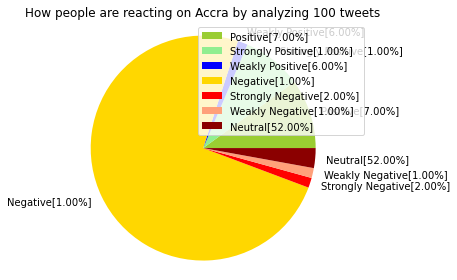

In [18]:
#Displaying summary on a piechart
plt.pie(sizes,labels=labels, colors=colors)
plt.legend(labels,loc="best")
plt.title("How people are reacting on "+ topic + " by analyzing "+ str(num_tweet)+ " tweets")
plt.axis('equal')
plt.tight_layout()
plt.show